# IMDB  Exploratory Data Analysis 

Description:

The dataset comprises anonymized data on movies available on IMDb, capturing various aspects such as genre, rating, and revenue.
This dataset can be utilized for analyzing movie trends, audience preferences, and the impact of different attributes like genre and director on movie success.

It can aid in understanding the factors contributing to high ratings and box office revenue, as well as providing insights into the popularity of genres over time.

This dataset can be utilized for analyzing movie success factors, audience preferences, and genre trends.

It can help in identifying the relationship between movie features (e.g., genre, director) and ratings or revenue, examining the popularity of actors and directors, and understanding critical reception through Metascore.

# Dataset Overview
The dataset contains 1000 rows and 12 columns, with the following features:

Rank: Rank of the movie.

Title: Title of the movie.

Genre: Genre(s) of the movie (multiple genres are separated by commas).

Description: A brief description of the movie.

Director: Director(s) of the movie.

Actors: Leading actors in the movie.

Year: Year of release.

Runtime (Minutes): Duration of the movie in minutes.

Rating: IMDb rating of the movie.

Votes: Number of votes received on IMDb.

Revenue (Millions): Revenue generated in millions of dollars (872 non-null entries, indicating missing values).

Metascore: Metascore rating (936 non-null entries, indicating missing values).

In [1]:
#Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("imdb_movie_dataset.csv")

In [3]:
df.sample(5)      #Shows the first 3 datasets

Rank          Title                   Genre  \
651   652         Solace     Crime,Drama,Mystery   
735   736           Hugo  Adventure,Drama,Family   
850   851             21    Crime,Drama,Thriller   
301   302  Lone Survivor  Action,Biography,Drama   
312   313   The Babadook            Drama,Horror   

                                           Description         Director  \
651  A psychic works with the FBI in order to hunt ...    Afonso Poyart   
735  In Paris in 1931, an orphan named Hugo Cabret ...  Martin Scorsese   
850  "21" is the fact-based story about six MIT stu...   Robert Luketic   
301  Marcus Luttrell and his team set out on a miss...       Peter Berg   
312  A single mother, plagued by the violent death ...    Jennifer Kent   

                                                Actors  Year  \
651  Anthony Hopkins, Jeffrey Dean Morgan, Abbie Co...  2015   
735  Asa Butterfield, Chloë Grace Moretz, Christoph...  2011   
850  Jim Sturgess, Kate Bosworth, Kevin Spacey, Aar...  2008   
301  Mark Wahlberg, Taylor Kitsch, Emile Hirsch, Be...  2013   
312  Essie Davis, Noah Wiseman, Daniel Henshall, Ha...  2014   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
651                101     6.4   36300                 NaN       36.0  
735                126     7.5  259182               73.82       83.0  
850                123     6.8  198395               81.16       48.0  
301                121     7.5  218996              125.07       60.0  
312                 93     6.8  132580                0.92       86.0

# Data Overview

In [4]:
# Viewing column names with List Compherension
[i for i in df.columns]

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [5]:

df.columns = [  'Rank',
                'Title',
                'Genre', 
                'Description', 
                'Director', 
                'Actors', 
                'Year',
                'Runtime', 
                'Rating', 
                'Votes', 
                'Revenue',
                'Metascore'  ]

[i for i in df.columns]

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime',
 'Rating',
 'Votes',
 'Revenue',
 'Metascore']

# Variable Types:

Numeric: Rank, Year, Runtime, Rating, Votes, Revenue, Metascore.

Categorical: Title, Genre, Description, Director, Actors.

In [6]:
# Here is all information about the structure of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Genre        1000 non-null   object 
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Actors       1000 non-null   object 
 6   Year         1000 non-null   int64  
 7   Runtime      1000 non-null   int64  
 8   Rating       1000 non-null   float64
 9   Votes        1000 non-null   int64  
 10  Revenue      872 non-null    float64
 11  Metascore    936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# Revenue and Votes:

Revenue has a high variance (mean = 82.96M, max = 936.63M).

Votes range widely (mean = ~169K, max = ~1.79M).

In [7]:
# Here is the summary of all numerical columns of Dataset
df.describe().T

count           mean            std     min       25%         50%  \
Rank       1000.0     500.500000     288.819436     1.0    250.75     500.500   
Year       1000.0    2012.783000       3.205962  2006.0   2010.00    2014.000   
Runtime    1000.0     113.172000      18.810908    66.0    100.00     111.000   
Rating     1000.0       6.723200       0.945429     1.9      6.20       6.800   
Votes      1000.0  169808.255000  188762.647518    61.0  36309.00  110799.000   
Revenue     872.0      82.956376     103.253540     0.0     13.27      47.985   
Metascore   936.0      58.985043      17.194757    11.0     47.00      59.500   

                  75%         max  
Rank          750.250     1000.00  
Year         2016.000     2016.00  
Runtime       123.000      191.00  
Rating          7.400        9.00  
Votes      239909.750  1791916.00  
Revenue       113.715      936.63  
Metascore      72.000      100.00

In [8]:
df.describe(include= "object")


Title                    Genre  \
count       1000                     1000   
unique       999                      207   
top     The Host  Action,Adventure,Sci-Fi   
freq           2                       50   

                                              Description      Director  \
count                                                1000          1000   
unique                                               1000           644   
top     A group of intergalactic criminals are forced ...  Ridley Scott   
freq                                                    1             8   

                                                   Actors  
count                                                1000  
unique                                                996  
top     Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...  
freq                                                    2

# Year:

Movies span from 2006 to 2016.

In [9]:
Min, Max = df["Year"].min(), df["Year"].max()

print(f"Movies span from {Min} to {Max}.")

Movies span from 2006 to 2016.


In [10]:
# Here is the 
shape = df.shape
rows, column = shape[1], shape[0]

print(f"The Total Rows of dataset are : {rows}")
print(f"The Total Columns of dataset are : {column}")

The Total Rows of dataset are : 12
The Total Columns of dataset are : 1000


# Missing Data:

Revenue data is missing for 128 movies.

Metascore data is missing for 64 movies.

In [11]:
# Fill missing values for 'Revenue (Millions)' with their respective means
df["Revenue"].fillna(df["Revenue"].mean(), inplace = True)

In [12]:
df["Revenue"].isnull().sum()

0

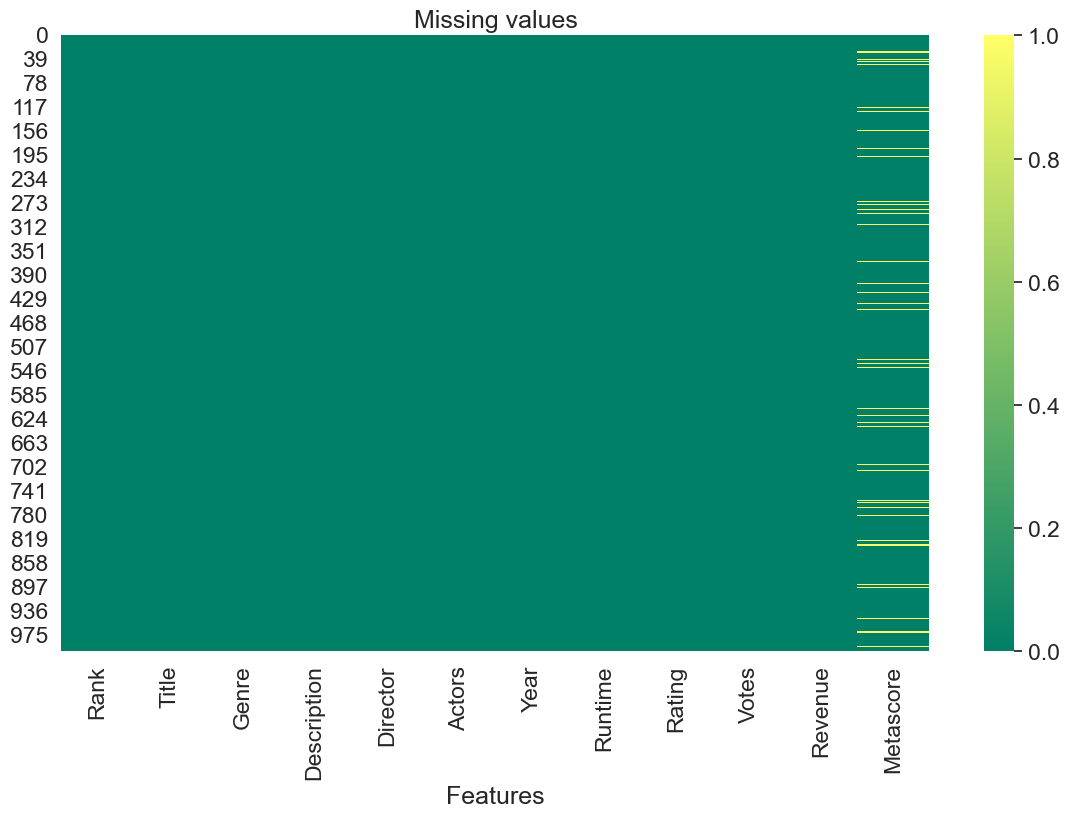

In [13]:
sns.set(style="darkgrid",font_scale=1.5)
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap="summer")
plt.xlabel('Features')
plt.title('Missing values')
plt.show()

In [14]:
# Fill missing values for 'Metascore' with their respective means

df["Metascore"].fillna(df["Metascore"].mean(), inplace = True)

In [15]:
df["Metascore"].isnull().sum()

0

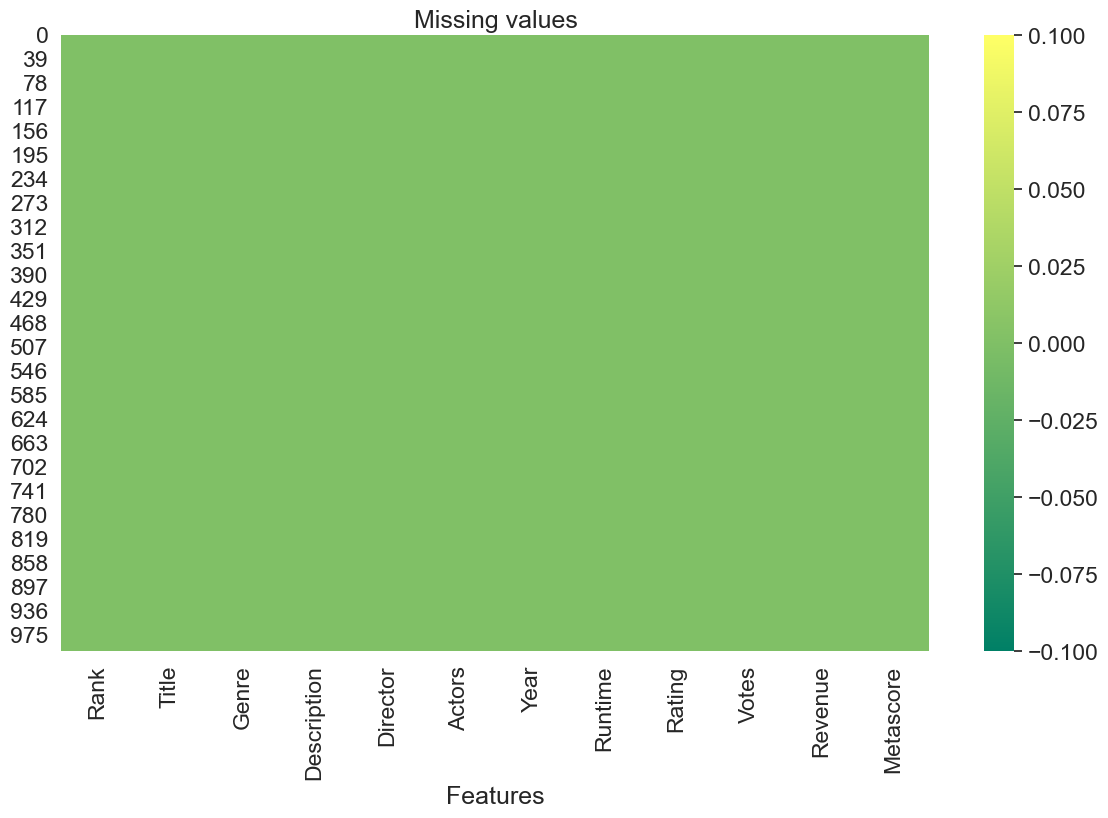

In [16]:
sns.set(style="darkgrid",font_scale=1.5)
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap="summer")
plt.xlabel('Features')
plt.title('Missing values')
plt.show()

In [17]:
# Viewing Null, Unique and Duplicated Values

pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

Count  Column   Size  Null  Null %  Not-Null  Unique  Duplicated
Rank          1000      12  12000     0     0.0      1000    1000           0
Title         1000      12  12000     0     0.0      1000     999           0
Genre         1000      12  12000     0     0.0      1000     207           0
Description   1000      12  12000     0     0.0      1000    1000           0
Director      1000      12  12000     0     0.0      1000     644           0
Actors        1000      12  12000     0     0.0      1000     996           0
Year          1000      12  12000     0     0.0      1000      11           0
Runtime       1000      12  12000     0     0.0      1000      94           0
Rating        1000      12  12000     0     0.0      1000      55           0
Votes         1000      12  12000     0     0.0      1000     997           0
Revenue       1000      12  12000     0     0.0      1000     815           0
Metascore     1000      12  12000     0     0.0      1000      85           0

# Exploratory Data Analysis (EDA)
Let's explore the data to understand the relationships between different features.

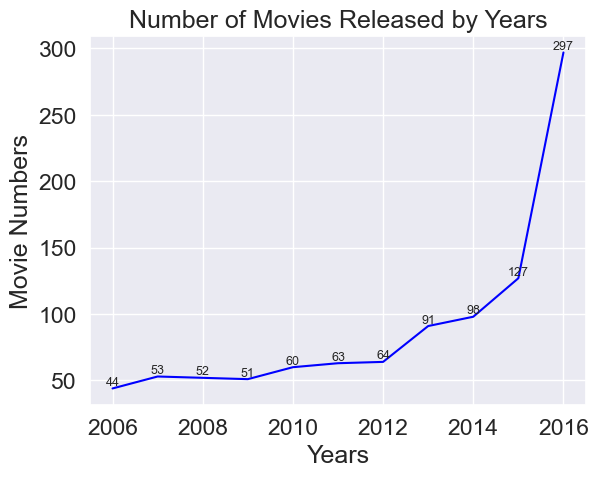

In [18]:
# Line Chart: Number of Movies Released by Years
movies_per_year = df['Year'].value_counts().sort_index()

plt.plot(movies_per_year.index, movies_per_year.values, color='blue')

plt.xlabel('Years')
plt.ylabel('Movie Numbers')

plt.title('Number of Movies Released by Years')

for x, y in zip(movies_per_year.index, movies_per_year.values):
    plt.text(x, y + 0.15, str(y), ha='center', va='bottom', fontsize=9)

plt.show()

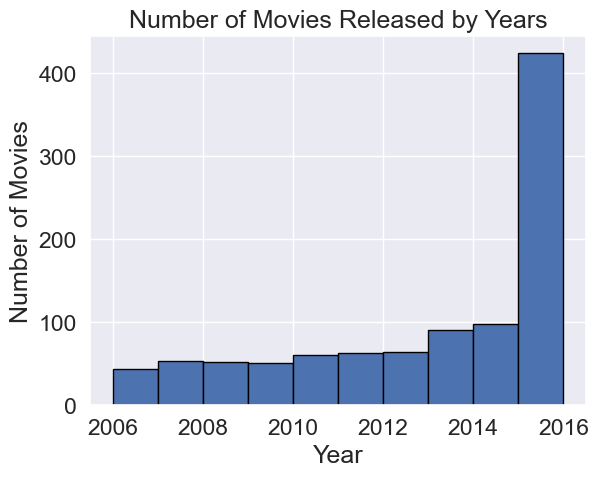

In [19]:
# Bar Chart: Number of Movies Released by Years
df['Year'].plot(kind='hist', bins=range(df['Year'].min(), df['Year'].max() + 1), edgecolor='black')

plt.title('Number of Movies Released by Years')

plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

In [20]:
# Function to plot distributions
def plot_distribution(df, column, title, xlabel):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

# Rating Distribution:

Ratings range from 1.9 to 9.0, with most movies clustered around 6.5 to 7.5.
Indicates a generally favorable trend in IMDb ratings.

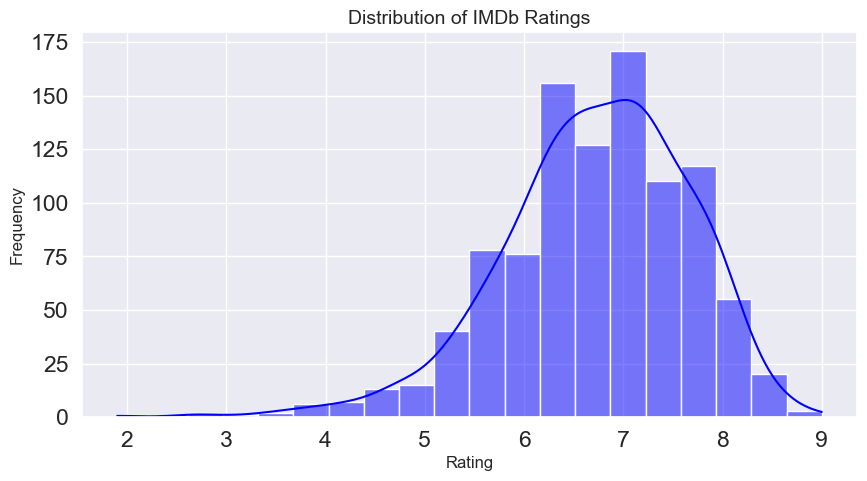

In [21]:
# Distribution of key variables
plot_distribution(df, 'Rating', 'Distribution of IMDb Ratings', 'Rating')


# Runtime Distribution:

The majority of movies are between 90 and 130 minutes.
A few movies exceed 150 minutes, which could indicate epic or extended features.

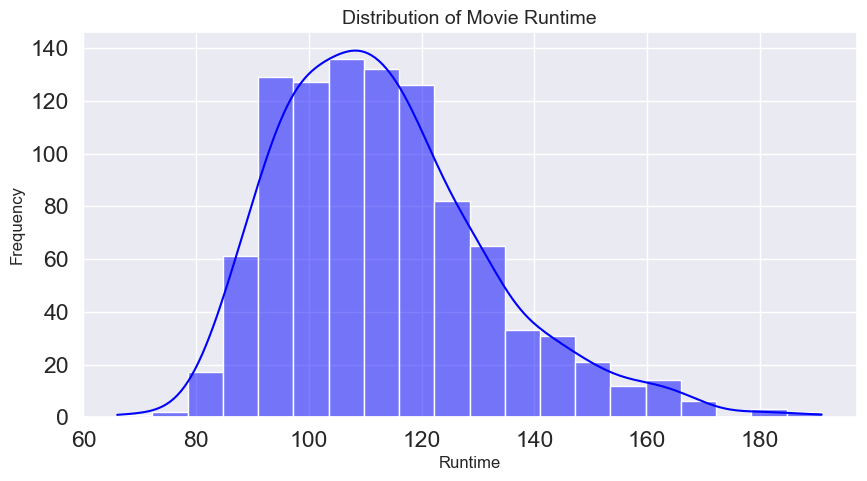

In [22]:
plot_distribution(df, 'Runtime', 'Distribution of Movie Runtime', 'Runtime')


# Revenue Distribution:

Revenue shows a strong right skew, with most movies earning less than $100M.
A small number of blockbusters significantly exceed the mean.

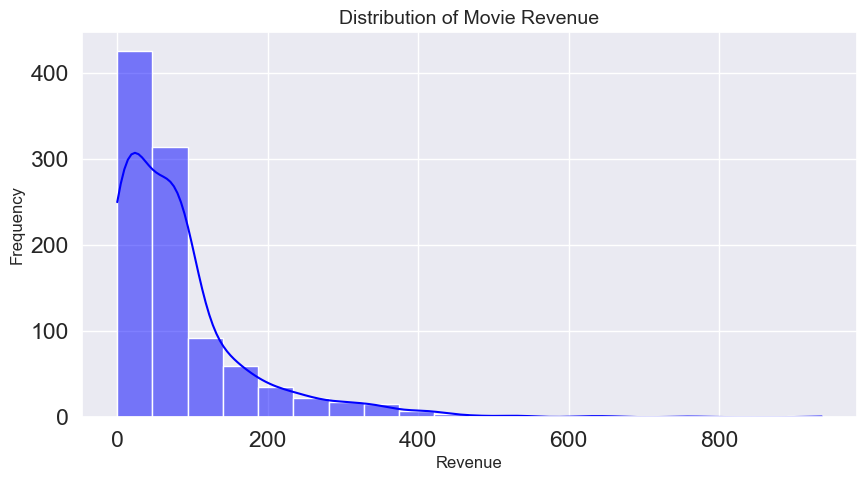

In [23]:
plot_distribution(df, 'Revenue', 'Distribution of Movie Revenue', 'Revenue')


# Metascore Distribution:

Metascores range from 11 to 100, with a peak around 60.
Indicates average critical reception for most movies.

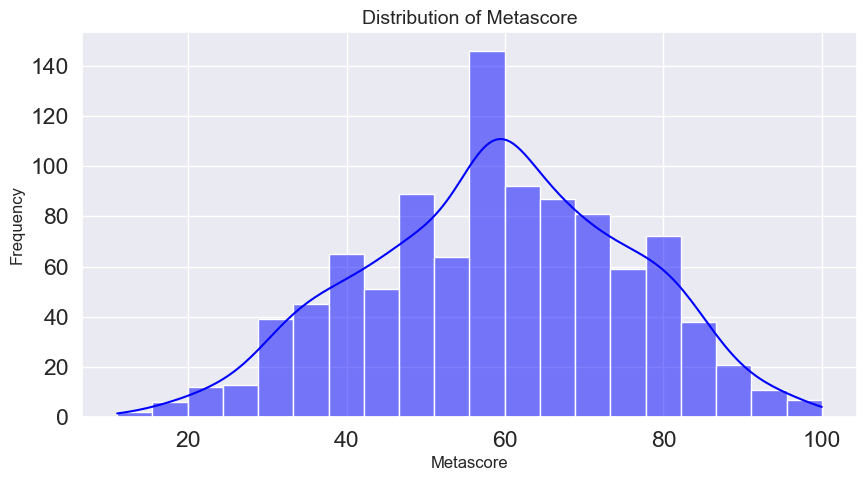

In [24]:
plot_distribution(df, 'Metascore', 'Distribution of Metascore', 'Metascore')

# Genre Popularity:

Top Genres: Action, Adventure, Drama, and Comedy are the most frequent.
Some movies belong to multiple genres, reflecting diverse audience preferences.

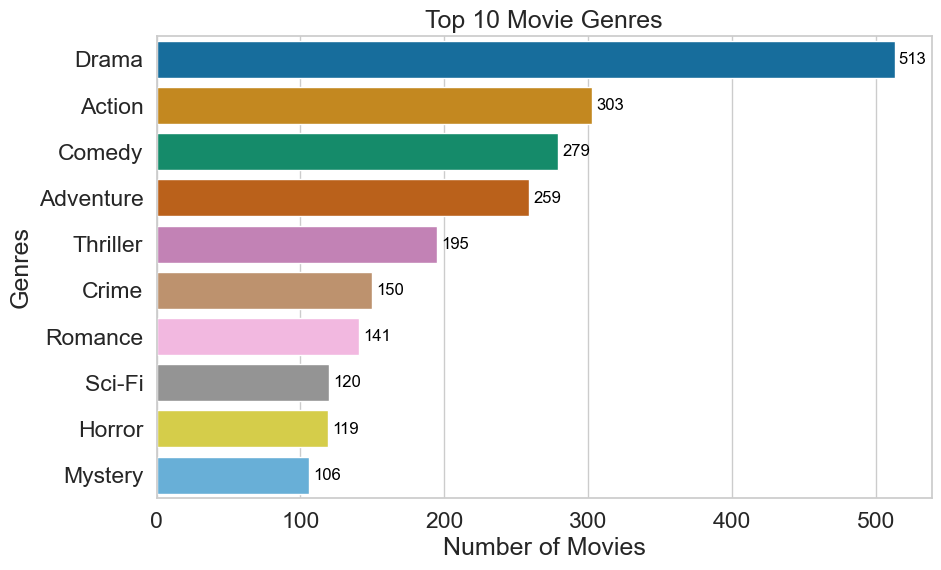

In [25]:
top10_genres = df["Genre"].str.split(",", expand=True).stack().value_counts()[:10]

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))

ax = sns.barplot(   x=top10_genres.values, 
                    y=top10_genres.index, 
                    palette="colorblind")

for container in ax.containers:
    ax.bar_label(   container, 
                    fmt='%d', 
                    label_type='edge', 
                    fontsize=12, 
                    color='black', 
                    padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Genres')

plt.title("Top 10 Movie Genres")

plt.show()

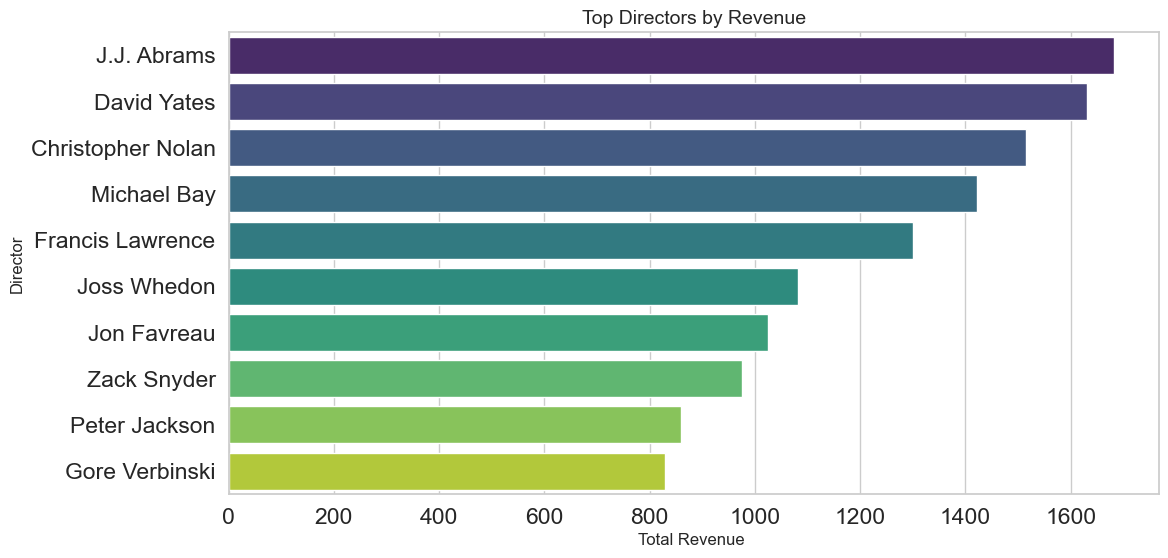

In [26]:
# Top directors by revenue
top_directors = df.groupby('Director').agg({
    'Rating': 'mean',
    'Revenue': 'sum'
}).sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors['Revenue'], y=top_directors.index, palette='viridis')
plt.title('Top Directors by Revenue', fontsize=14)
plt.xlabel('Total Revenue ', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()


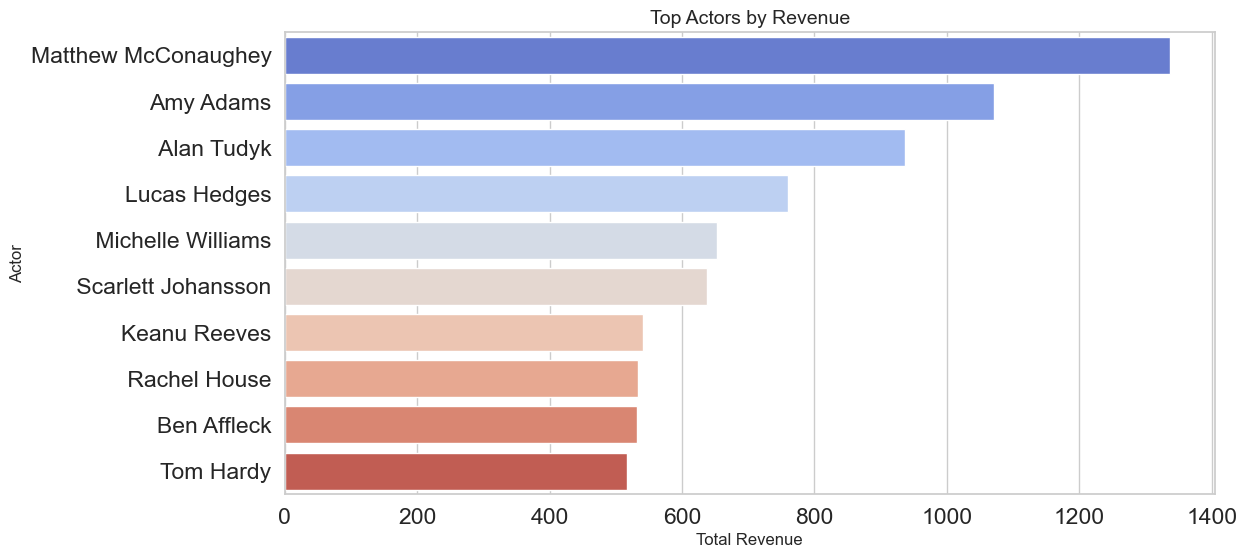

In [27]:
# Top actors by revenue
actor_performance = df[['Rating', 'Revenue']].join(
    df['Actors'].str.split(',', expand=True).stack().reset_index(drop=True).rename('Actor')
)

actor_performance_summary = actor_performance.groupby('Actor').agg({
    'Rating': 'mean',
    'Revenue': 'sum'
}).sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_performance_summary['Revenue'], 
            y=actor_performance_summary.index, palette='coolwarm')
plt.title('Top Actors by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.show()

# Donut Chart: The 10 Most Filmed Genres

In [28]:
import plotly.express as px
top_genres = df["Genre"].str.split(",", expand=True).stack().value_counts()[:10]

fig = px.pie(   values=top_genres.values, names=top_genres.index,
                title='The 10 most filmed genres',
                labels={'value': 'Number', 'names': 'Genres'},
                hover_data={'value': top_genres.values, 'names': top_genres.index},
                hole=0.5)

fig.update_traces(textposition='inside', textinfo='percent+value', textfont_size=12)

fig.update_traces(marker=dict(line=dict(color='white', width=2)))

fig.show()


# Pie Chart: The 10 Most Filmed Genres

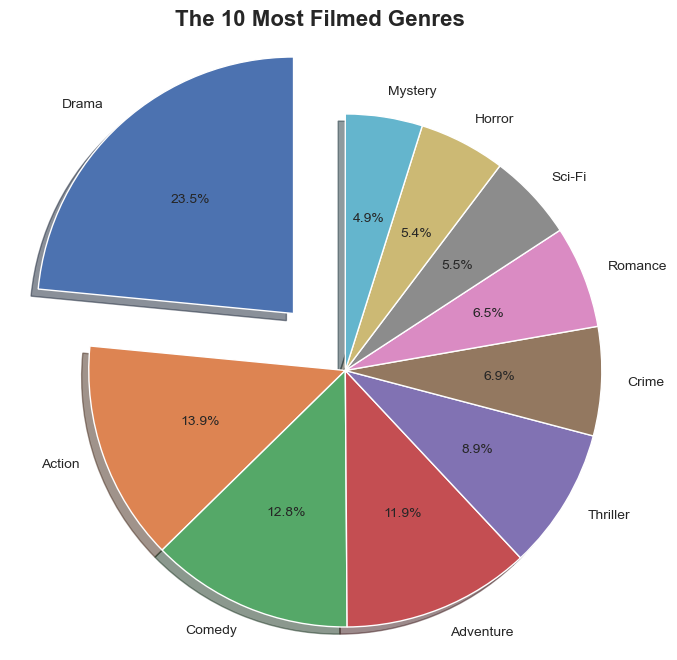

In [29]:
top_genres = df["Genre"].str.split(",", expand=True).stack().value_counts()[:10]

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(top_genres.values, 
       labels=top_genres.index, 
       autopct='%1.1f%%', 
       startangle=90,
       explode=(0.3, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0), 
       shadow = 0.1, 
       textprops={'fontsize': 10})


ax.set_title('The 10 Most Filmed Genres', fontsize=16, fontweight='bold')

ax.axis('equal')

plt.show()

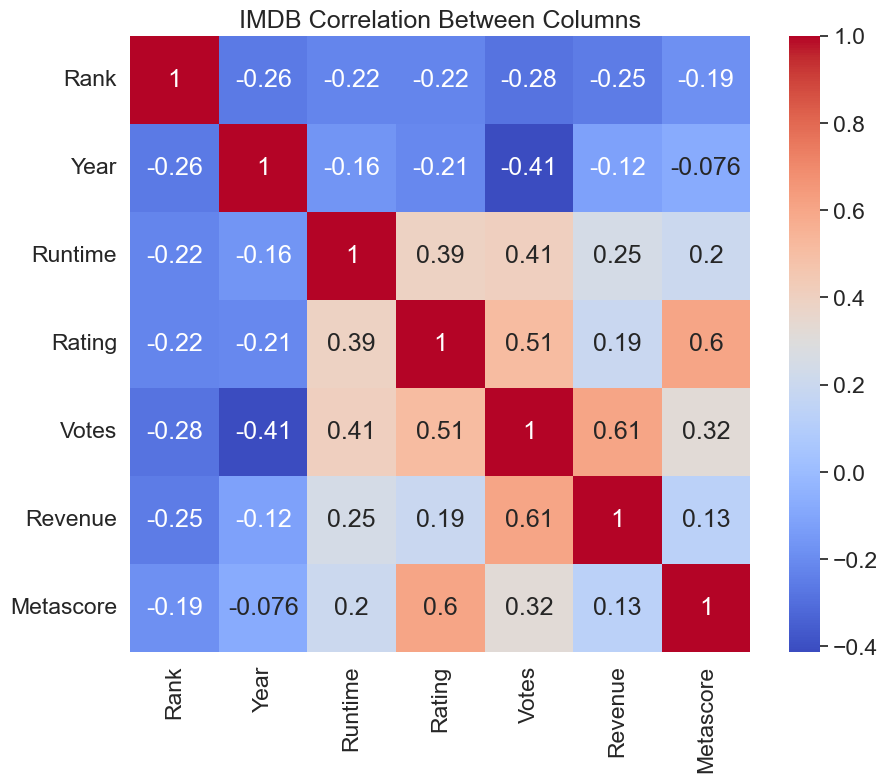

In [30]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(exclude="object")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('IMDB Correlation Between Columns', fontsize=18)
plt.show()

In [31]:
# top 10 directors
director_counts = df['Director'].str.split(', ', expand=True).stack().value_counts()[1:11]
director_counts

David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Martin Scorsese       5
Name: count, dtype: int64

# Relationship Between Ratings and Number of Votes

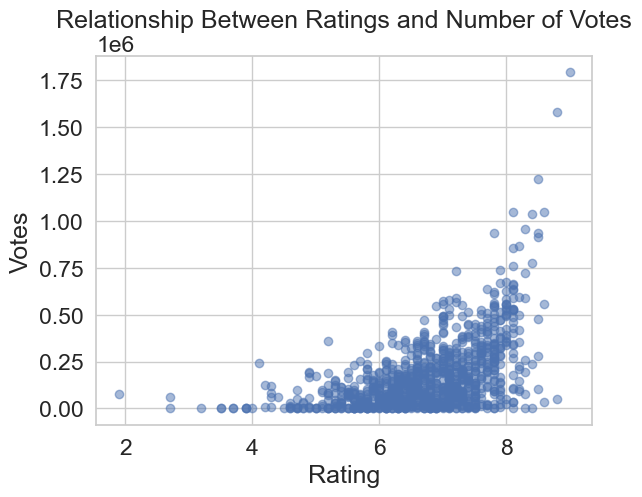

In [32]:
# Scatter Plot: Relationship Between Ratings and Number of Votes
plt.scatter(df['Rating'], df['Votes'], alpha=0.5)
plt.title('Relationship Between Ratings and Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

# Conclusion

The project provides a comprehensive exploration of a movie dataset, from data cleaning and handling missing values to detailed exploratory analysis and visualizations. The outcomes will offer insights into:

The revenue trends over the years.

Genre-based and director-specific patterns.

Relationships between movie runtime, ratings, and revenue.

The visualizations will enhance understanding of movie attributes and highlight key trends and insights within the dataset, leading to meaningful conclusions about popular genres, successful directors, and other significant factors in the movie industry.

# Feature Engineering 

### Simplify and encode categorical columns

In [33]:
df_d = df['Genre'] = df['Genre'].astype(str).str.split(',').str[0]
df_d

0         Action
1      Adventure
2         Horror
3      Animation
4         Action
         ...    
995        Crime
996       Horror
997        Drama
998    Adventure
999       Comedy
Name: Genre, Length: 1000, dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'Actors' column
df['Encoded_Genre'] = le.fit_transform(df['Genre'])

# Count occurrences of each encoded actor
Genre_value_counts = df['Encoded_Genre'].value_counts()

# Create a DataFrame from value counts with clear naming
Genre_counts_df = pd.DataFrame(Genre_value_counts).reset_index().rename(columns={'index': 'Encoded_Genre', 'Encoded_Genre': 'Count'})

# Display the resulting DataFrame
print(Genre_counts_df)


    Count  count
0       0    293
1       6    195
2       4    175
3       1     75
4       5     71
5       3     64
6       2     49
7       8     46
8       9     13
9      12     10
10      7      4
11     11      3
12     10      2


In [35]:
df

Rank                    Title      Genre  \
0       1  Guardians of the Galaxy     Action   
1       2               Prometheus  Adventure   
2       3                    Split     Horror   
3       4                     Sing  Animation   
4       5            Suicide Squad     Action   
..    ...                      ...        ...   
995   996     Secret in Their Eyes      Crime   
996   997          Hostel: Part II     Horror   
997   998   Step Up 2: The Streets      Drama   
998   999             Search Party  Adventure   
999  1000               Nine Lives     Comedy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  Runtime  Rating  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   
..                                                 ...   ...      ...     ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015      111     6.2   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007       94     5.5   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008       98     6.2   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014       93     5.6   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016       87     5.3   

      Votes     Revenue  Metascore  Encoded_Genre  
0    757074  333.130000       76.0              0  
1    485820  126.460000       65.0              1  
2    157606  138.120000       62.0              8  
3     60545  270.320000       59.0              2  
4    393727  325.020000       40.0              0  
..      ...         ...        ...            ...  
995   27585   82.956376       45.0              5  
996   73152   17.540000       46.0              8  
997   70699   58.010000       50.0              6  
998    4881   82.956376       22.0              1  
999   12435   19.640000       11.0              4  

[1000 rows x 13 columns]

In [36]:
df.Actors.unique(), df.Actors.nunique()

(array(['Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
        'Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron',
        'James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula',
        'Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson',
        'Will Smith, Jared Leto, Margot Robbie, Viola Davis',
        'Matt Damon, Tian Jing, Willem Dafoe, Andy Lau',
        'Ryan Gosling, Emma Stone, Rosemarie DeWitt, J.K. Simmons',
        'Essie Davis, Andrea Riseborough, Julian Barratt,Kenneth Branagh',
        'Charlie Hunnam, Robert Pattinson, Sienna Miller, Tom Holland',
        'Jennifer Lawrence, Chris Pratt, Michael Sheen,Laurence Fishburne',
        'Eddie Redmayne, Katherine Waterston, Alison Sudol,Dan Fogler',
        'Taraji P. Henson, Octavia Spencer, Janelle Monáe,Kevin Costner',
        'Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen',
        "Auli'i Cravalho, Dwayne Johnson, Rachel House, Temuera Morrison"

In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample DataFrame creation (for context)
# df = pd.DataFrame({'Actors': ['Actor A', 'Actor B', 'Actor A', 'Actor C']})

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'Actors' column
df['Encoded_Actors'] = le.fit_transform(df['Actors'])

# Count occurrences of each encoded actor
actors_value_counts = df['Encoded_Actors'].value_counts()

# Create a DataFrame from value counts with clear naming
actors_counts_df = pd.DataFrame(actors_value_counts).reset_index().rename(columns={'index': 'Encoded_Actor', 'Encoded_Actors': 'Count'})

# Display the resulting DataFrame
print(actors_counts_df)



     Count  count
0      458      2
1      232      2
2      870      2
3      353      2
4      184      1
..     ...    ...
991     31      1
992    858      1
993     15      1
994    953      1
995    550      1

[996 rows x 2 columns]


In [38]:
df.sample(3)

Rank                                        Title   Genre  \
935   936  Talladega Nights: The Ballad of Ricky Bobby  Action   
157   158                         Crazy, Stupid, Love.  Comedy   
345   346                         The Three Musketeers  Action   

                                           Description            Director  \
935  #1 NASCAR driver Ricky Bobby stays atop the he...          Adam McKay   
157  A middle-aged husband's life changes dramatica...       Glenn Ficarra   
345  The hot-headed young D'Artagnan along with thr...  Paul W.S. Anderson   

                                                Actors  Year  Runtime  Rating  \
935  Will Ferrell, John C. Reilly, Sacha Baron Cohe...  2006      108     6.6   
157  Steve Carell, Ryan Gosling, Julianne Moore, Em...  2011      118     7.4   
345  Logan Lerman, Matthew Macfadyen, Ray Stevenson...  2011      110     5.8   

      Votes  Revenue  Metascore  Encoded_Genre  Encoded_Actors  
935  137502   148.21       66.0              0             962  
157  396714    84.24       68.0              4             885  
345   92329    20.32       35.0              0             603

# Step 3: Drop text-heavy or irrelevant columns

In [39]:
columns_to_drop = ['Description', 'Title', 'Director', 'Encoded_Actors']
data_cleaned = df.drop(columns=columns_to_drop)

In [40]:
data_cleaned

Rank      Genre                                             Actors  Year  \
0       1     Action  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1       2  Adventure  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2       3     Horror  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3       4  Animation  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4       5     Action  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..    ...        ...                                                ...   ...   
995   996      Crime  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996   997     Horror  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997   998      Drama  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998   999  Adventure  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  1000     Comedy  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime  Rating   Votes     Revenue  Metascore  Encoded_Genre  
0        121     8.1  757074  333.130000       76.0              0  
1        124     7.0  485820  126.460000       65.0              1  
2        117     7.3  157606  138.120000       62.0              8  
3        108     7.2   60545  270.320000       59.0              2  
4        123     6.2  393727  325.020000       40.0              0  
..       ...     ...     ...         ...        ...            ...  
995      111     6.2   27585   82.956376       45.0              5  
996       94     5.5   73152   17.540000       46.0              8  
997       98     6.2   70699   58.010000       50.0              6  
998       93     5.6    4881   82.956376       22.0              1  
999       87     5.3   12435   19.640000       11.0              4  

[1000 rows x 10 columns]

In [41]:
from sklearn.preprocessing import StandardScaler

# Step 4: Scale numerical features

In [42]:
numerical_cols = ['Runtime', 'Votes', 'Revenue', 'Metascore', 'Year']
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Save the cleaned dataset (optional)

In [43]:
output_path = 'cleaned_imdb_movie_dataset.csv'  # Update with your desired output path
data_cleaned.to_csv(output_path, index=False)

In [44]:
data_cleaned.sample(3)

Rank      Genre                                             Actors  \
45     46     Action  Johnny Depp, Penélope Cruz, Ian McShane, Geoff...   
912   913  Adventure  Josh Hutcherson, AnnaSophia Robb, Zooey Descha...   
911   912   Thriller  Ruth Wilson, Paula Prentiss, Lucy Boynton, Bob...   

         Year   Runtime  Rating     Votes   Revenue  Metascore  Encoded_Genre  
45  -0.556430  1.214158     6.7  1.193718  1.640695  -0.841128              0  
912 -1.804730 -0.913331     7.2 -0.278326 -0.007538   0.903072              1  
911  1.003945 -1.392017     4.7 -0.877754  0.000000   0.542203             12

# Prediction of Model

Splitting the Data

Splitting dataset into training and testing sets. 



In [45]:
from sklearn.model_selection import train_test_split

X = df[['Rank', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Encoded_Genre']]
y = df['Metascore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

Train the models using the training data.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Example with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

 Model Evaluation
    
Evaluate the performance of each model using metrics such as Mean Squared Error (MSE) or R-squared.

In [47]:
# Predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Linear Regression MSE: {lr_mse}")

Random Forest MSE: 152.26537496338528
Linear Regression MSE: 155.935333079584


Hyperparameter Tuning

Use techniques such as Grid Search or Random Search to find the best hyperparameters for your models.

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]})

# Purpose
The purpose of this function is to identify and remove columns from a dataset that have a correlation coefficient above a specified threshold. This is useful in data preprocessing, especially in machine learning, where multicollinearity can negatively impact model performance.